# Board Game Behavior: An Analysis of Demographics and Gameplay Preferences

## Documentation

[Initial Project Proposal](https://github.com/sevenwwu/sevenwwu.github.io/blob/main/write-ups/initial_project_proposal_revised.md) (11/8/23)

[Milestone One](https://github.com/sevenwwu/sevenwwu.github.io/tree/main/write-ups/milestone_one_delieverable) (11/18/23)

## Data Processing and Modeling

In [1]:
!python -m pip install pandas
!python -m pip install openpyxl
!python -m pip install seaborn

### Data Cleaning

In [2]:
import pandas as pd
import numpy as np

raw_df = pd.read_excel("datasets/rawdata.xlsx",keep_default_na=False)

raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column                                                                                                                                               Non-Null Count  Dtype         
---  ------                                                                                                                                               --------------  -----         
 0   ID                                                                                                                                                   113 non-null    int64         
 1   Start time                                                                                                                                           113 non-null    datetime64[ns]
 2   Completion time                                                                                                                                      1

##### Drop Metadata

In [3]:
dropped_df = raw_df.drop(columns=["ID","Start time","Completion time","Email","Name","Last modified time"])

dropped_df[:0]

,I am a:,What is your Gender Identity?,What is your Age?\n(this field may remain blank),What is your Race?,What is your current Employment Status?,Do you wear glasses or contact lenses for vision correction?,"What best describes your current religious or spiritual beliefs, if any?\n",What is your Area of Study or Major? \n(this field may remain blank)\n,"Do you enjoy playing board games, card games, or similar tabletop games?","How many board/card games do you own? \n(All non-roleplay table top games are included, i.e., chess, playing cards, Uno, Magic: The Gathering, etc.)",About how frequently do you play board/card games?,Select what best describes your engagement and style when it comes to board and card games?,I prefer games that include elements of:\n(select all that you prefer),"List up to 15 board/card games that you enjoy playing. \n(abide by the format: ""Game 1"", ""Game 2"", ""Game 3"")\n(this field may remain blank)\n","On a scale from 1 to 10, how much do you enjoy playing chess, with 1 being not enjoyable at all and 10 being extremely enjoyable?","Select your all genres of board/card games you enjoy.\n(if your preferred genre(s) is/are not listed, please list them in the ""other"" selection)"


#### Rename Raw Fields from Question to Concise Description

In [4]:
renamed_df = dropped_df.rename(columns={
    "I am a:": "WWUStatus",
    "What is your Gender Identity?": "Gender",
    "What is your Age?\n(this field may remain blank)": "Age",
    "What is your Race?": "Race(s)",
    "What is your current Employment Status?": "EmploymentStatus",
    "Do you wear glasses or contact lenses for vision correction?": "Vision",
    "What best describes your current religious or spiritual beliefs, if any?\n": "Religiosity",
    "What is your Area of Study or Major? \n(this field may remain blank)\n": "AOS",
    "Do you enjoy playing board games, card games, or similar tabletop games?": "EnjoysBoardGames",
    "How many board/card games do you own? \n(All non-roleplay table top games are included, i.e., chess, playing cards, Uno, Magic: The Gathering, etc.)": "BoardGamesOwned",
    "About how frequently do you play board/card games?": "FrequencyOfPlay",
    "Select what best describes your engagement and style when it comes to board and card games? ": "Style",
    "I prefer games that include elements of:\n(select all that you prefer)": "PreferredElements",
    "List up to 15 board/card games that you enjoy playing. \n(abide by the format: \"Game 1\", \"Game 2\", \"Game 3\")\n(this field may remain blank)\n": "EnjoyedBoardGames",
    "On a scale from 1 to 10, how much do you enjoy playing chess, with 1 being not enjoyable at all and 10 being extremely enjoyable?": "ChessRating",
    "Select your all genres of board/card games you enjoy.\n(if your preferred genre(s) is/are not listed, please list them in the \"other\" selection)": "EnjoyedGenres"
})

renamed_df[:0]


,WWUStatus,Gender,Age,Race(s),EmploymentStatus,Vision,Religiosity,AOS,EnjoysBoardGames,BoardGamesOwned,FrequencyOfPlay,Style,PreferredElements,EnjoyedBoardGames,ChessRating,EnjoyedGenres


#### Multiselect Binary/Boolean Features

##### Race(s)

In [5]:
renamed_df["Race(s)"].value_counts()

Race(s)
White;                                        83
Hispanic or Latino;                            7
Asian;                                         5
White;Hispanic or Latino;                      3
White;Asian;                                   2
Asian;Hispanic or Latino;                      2
White;Black or African American;               2
Native American or American Indian;            1
Prefer not to say;                             1
White;Black or African American;Asian;         1
Asian;White;                                   1
Hispanic or Latino;White;                      1
White;Native Hawaiian or Pacific Islander;     1
Asian;Filipino;                                1
Black or African American;White;               1
Black or African American;White;Asian;         1
Name: count, dtype: int64

In [6]:
raceClean_df = renamed_df.copy()

unique_races = set()
for elements in raceClean_df["Race(s)"].dropna():
    unique_races.update(elements.split(';'))

unique_races = list(unique_races)
unique_races.sort()

In [7]:
# Create a new column for each unique element with binary values (0 or 1 or None)
for element in unique_races:
    raceClean_df[(element + "IsRace").replace(" ", "")] = raceClean_df["Race(s)"].apply(
        lambda x: int(element in x) if pd.notna(x) else None
    )

raceClean_df = raceClean_df.drop(columns={"Race(s)","IsRace"})

##### PreferredElements

In [8]:
raceClean_df["PreferredElements"].value_counts()

PreferredElements
Party/Low-Stakes;                                                                                                                              3
Conflict/Competition;Luck;Strategy;Social Deduction/Hidden Role;                                                                               2
Cooperation;Conflict/Competition;Luck;Strategy;Social Deduction/Hidden Role;Heavy/Immersive Theming;Puzzle-Solving;Trivia;Party/Low-Stakes;    2
Conflict/Competition;                                                                                                                          2
Conflict/Competition;Strategy;                                                                                                                 2
                                                                                                                                              ..
Luck;Puzzle-Solving;Strategy;                                                                                   

In [9]:
preferredElementsClean_df = raceClean_df.copy()

unique_preferred_elements = set()
for elements in preferredElementsClean_df['PreferredElements'].dropna():
    unique_preferred_elements.update(elements.split(';'))
unique_preferred_elements

unique_preferred_elements = list(unique_preferred_elements)
unique_preferred_elements.sort()

In [10]:
# Create a new column for each unique element with binary values (0 or 1 or None)
for element in unique_preferred_elements:
    preferredElementsClean_df[(element + "IsPreferredElement").replace(" ", "")] = preferredElementsClean_df['PreferredElements'].apply(
        lambda x: int(element in x) if pd.notna(x) else None
    )

preferredElementsClean_df = preferredElementsClean_df.drop(columns={"PreferredElements","IsPreferredElement"})

##### EnjoyedGenres

In [11]:
enjoyedGenresClean_df = preferredElementsClean_df.copy()

unique_enjoyed_genres = set()
for elements in enjoyedGenresClean_df["EnjoyedGenres"].dropna():
    unique_enjoyed_genres.update(elements.split(';'))
unique_enjoyed_genres

unique_enjoyed_genres = list(unique_enjoyed_genres)
unique_enjoyed_genres.sort()

In [12]:
# Create a new column for each unique element with binary values (0 or 1 or None)
for element in unique_enjoyed_genres:
    enjoyedGenresClean_df[(element + "IsEnjoyedGenre").replace(" ", "")] = enjoyedGenresClean_df["EnjoyedGenres"].apply(
        lambda x: int(element in x) if pd.notna(x) else None
    )

enjoyedGenresClean_df = enjoyedGenresClean_df.drop(columns={"EnjoyedGenres","IsEnjoyedGenre"})

In [13]:
enjoyedGenresClean_df.columns.tolist()

['WWUStatus',
 'Gender',
 'Age',
 'EmploymentStatus',
 'Vision',
 'Religiosity',
 'AOS',
 'EnjoysBoardGames',
 'BoardGamesOwned',
 'FrequencyOfPlay',
 'Style',
 'EnjoyedBoardGames',
 'ChessRating',
 'AsianIsRace',
 'BlackorAfricanAmericanIsRace',
 'FilipinoIsRace',
 'HispanicorLatinoIsRace',
 'NativeAmericanorAmericanIndianIsRace',
 'NativeHawaiianorPacificIslanderIsRace',
 'PrefernottosayIsRace',
 'WhiteIsRace',
 'Conflict/CompetitionIsPreferredElement',
 'CooperationIsPreferredElement',
 'Heavy/ImmersiveThemingIsPreferredElement',
 'LuckIsPreferredElement',
 'Party/Low-StakesIsPreferredElement',
 'Puzzle-SolvingIsPreferredElement',
 'SocialDeduction/HiddenRoleIsPreferredElement',
 'StrategyIsPreferredElement',
 'TriviaIsPreferredElement',
 'AbstractStrategyIsEnjoyedGenre',
 'AdventureIsEnjoyedGenre',
 'AnimalsIsEnjoyedGenre',
 'AuctionIsEnjoyedGenre',
 'CardIsEnjoyedGenre',
 'CardDraftingIsEnjoyedGenre',
 'CivilizationIsEnjoyedGenre',
 'Cooperative\xa0IsEnjoyedGenre',
 'Deck-Building

In [14]:
reformatColumns_df = enjoyedGenresClean_df.rename(columns=lambda x: x.replace("\xa0", ""))

reformatColumns_df.columns.tolist()

['WWUStatus',
 'Gender',
 'Age',
 'EmploymentStatus',
 'Vision',
 'Religiosity',
 'AOS',
 'EnjoysBoardGames',
 'BoardGamesOwned',
 'FrequencyOfPlay',
 'Style',
 'EnjoyedBoardGames',
 'ChessRating',
 'AsianIsRace',
 'BlackorAfricanAmericanIsRace',
 'FilipinoIsRace',
 'HispanicorLatinoIsRace',
 'NativeAmericanorAmericanIndianIsRace',
 'NativeHawaiianorPacificIslanderIsRace',
 'PrefernottosayIsRace',
 'WhiteIsRace',
 'Conflict/CompetitionIsPreferredElement',
 'CooperationIsPreferredElement',
 'Heavy/ImmersiveThemingIsPreferredElement',
 'LuckIsPreferredElement',
 'Party/Low-StakesIsPreferredElement',
 'Puzzle-SolvingIsPreferredElement',
 'SocialDeduction/HiddenRoleIsPreferredElement',
 'StrategyIsPreferredElement',
 'TriviaIsPreferredElement',
 'AbstractStrategyIsEnjoyedGenre',
 'AdventureIsEnjoyedGenre',
 'AnimalsIsEnjoyedGenre',
 'AuctionIsEnjoyedGenre',
 'CardIsEnjoyedGenre',
 'CardDraftingIsEnjoyedGenre',
 'CivilizationIsEnjoyedGenre',
 'CooperativeIsEnjoyedGenre',
 'Deck-BuildingIsEn

### AOS (manual string bucketing)

In [15]:
aos_df = reformatColumns_df
aos_df["AOS"].str.lower().unique()

array(['computer science ', 'data science ', 'data science', 'eece',
       'electrical and computer engineering ', 'statistics',
       'environmental studies', 'applied mathematics', 'chemistry', 'rml',
       'political science', 'elementary education', 'english',
       'music education', 'n/a', 'art', 'psychology', '',
       'psych (probably)', 'music', 'environmental science - toxicology',
       'history/museum studies', 'elementary ed',
       'environmental science ', 'mathematics ', 'business', 'biochem ',
       'vocal performance ', 'secondary education ', 'business ',
       'linguistics', 'history', 'bio/anth', 'mathematics',
       'marine biology ', 'environmental science',
       'communication disorders', 'engineering ', 'biochem',
       'kinesiology', 'economics and mathematics',
       'music education and german', 'art p-12',
       'chemistry either organic or inorganic', 'math',
       'electrical engineering',
       'undecided but leaning towards engineering'

In [16]:
manual_mapping_aos = {
    'computer science': 'STEM',
    'data science': 'STEM',
    'eece': 'STEM',
    'electrical and computer engineering': 'STEM',
    'statistics': 'STEM',
    'environmental studies': 'STEM',
    'applied mathematics': 'STEM',
    'chemistry': 'STEM',
    'rml': 'Other',
    'political science': 'Social Studies',
    'elementary education': 'Education',
    'english': 'Arts & Humanities',
    'music education': 'Arts & Humanities',
    'nan': 'Other',
    'art': 'Arts & Humanities',
    'psychology': 'Social Studies',
    'psych (probably)': 'Social Studies',
    'music': 'Arts & Humanities',
    'environmental science - toxicology': 'STEM',
    'history/museum studies': 'Arts & Humanities',
    'elementary ed': 'Education',
    'environmental science': 'STEM',
    'mathematics': 'STEM',
    'business': 'Business',
    'biochem': 'STEM',
    'vocal performance': 'Arts & Humanities',
    'secondary education': 'Education',
    'linguistics': 'Arts & Humanities',
    'history': 'Arts & Humanities',
    'bio/anth': 'STEM',
    'marine biology': 'STEM',
    'communication disorders': 'Health & Medicine',
    'engineering': 'STEM',
    'kinesiology': 'Health & Medicine',
    'economics and mathematics': 'STEM',
    'music education and german': 'Arts & Humanities',
    'art p-12': 'Arts & Humanities',
    'chemistry either organic or inorganic': 'STEM',
    'math': 'STEM',
    'electrical engineering': 'STEM',
    'undecided but leaning towards engineering': 'Other',  # Assuming lean towards STEM, but no exact match
    'medicine': 'Health & Medicine',
    'rec management': 'Other',  # Assuming Recreation Management
    'economics': 'Social Studies',  # Close to 'economics and mathematics', but economics is often considered Social Studies
    'geology': 'STEM',
    'geology (paleoclimate)': 'STEM',
    'visual journalism': 'Arts & Humanities',
    'biology/math': 'STEM',  # Combination of two STEM fields
    'behavioral neuroscience': 'STEM',  # Close to 'psychology' which is Social Studies, but has a heavy STEM component
    'marine biology and theater production': 'STEM',  # Marine biology is STEM, theater production could be Arts, but STEM is the primary
    'anthropology': 'Social Studies',
    'biology': 'STEM',
    'management information systems': 'Business',
    'marine bio': 'STEM',
    'history/holocaust & genocide studies': 'Arts & Humanities',
    'sped & eled': 'Education',  # Assuming this refers to special education & elementary education
    'anthropology, communication studies': 'Social Studies',
    'theatre': 'Arts & Humanities',
    'studio art': 'Arts & Humanities',
    'urban planning and sustainable development': 'Other',  # Not a clear category, could be Social Studies or another category
    'art and design': 'Arts & Humanities',
    'spanish': 'Arts & Humanities',  # Language studies are often classified here
    'biochemistry': 'STEM',
    'art studio': 'Arts & Humanities',
    'art ed': 'Arts & Humanities',
    'comm': 'Other',  # Assuming 'communication', but not explicitly listed, could fit Social Studies or Business,
    # Any further missing areas of study would need specific consideration and mapping.
}



def categorize_aos_string(aos):
    if pd.isnull(aos) or aos == "n/a" or aos == "" or aos == "N/A":
        return 'Unknown'  # For handling NaN values
    field_clean = aos.lower().rstrip()
    for key, category in manual_mapping_aos.items():
        if key == field_clean:
            return category
    raise ValueError(f"Unknown category: {aos}") 

aos_df["AOSCat"] = aos_df["AOS"].apply(categorize_aos_string)

aos_df["AOSCat"].unique()

array(['STEM', 'Other', 'Social Studies', 'Education',
       'Arts & Humanities', 'Unknown', 'Business', 'Health & Medicine'],
      dtype=object)

### Shorting the Length of Single Select Answer Choices for "Style"

In [17]:
style_df = aos_df 

style_df["Style"].unique()

array(['Not interested in playing board/card games.',
       'Party-only player, primarily playing board/card games at social gatherings or parties.',
       'Strategy-focused player, enjoying games that require planning and tactics, but also participates in more casual games.',
       'Situation-Specific Player, adapts style and enthusiasm based on the specific game or social context. May be casual in some situations and highly strategic in others, depending on the game being played.',
       'None of these describe me.',
       'Casual player, participating for fun and relaxation, without a strong focus on winning. Still willing to engage with complex games.',
       'Simple and straightforward player, preferring uncomplicated games with easy rules.'],
      dtype=object)

In [18]:
player_styles_mapping = {
    "Strategy-focused player, enjoying games that require planning and tactics, but also participates in more casual games.": "Strategic",
    "Situation-Specific Player, adapts style and enthusiasm based on the specific game or social context. May be casual in some situations and highly strategic in others, depending on the game being played.": "Situation-Specific",
    "Casual player, participating for fun and relaxation, without a strong focus on winning. Still willing to engage with complex games.": "Casual",
    "Simple and straightforward player, preferring uncomplicated games with easy rules.": "Simple",
    "Party-only player, primarily playing board/card games at social gatherings or parties.": "Party/Social",
    "Not interested in playing board/card games.": "Not Interested",
    "Never played or never had the opportunity to play board/card games.": "Never Played",
    "None of these describe me.": "Other",
    "Prefer not to say": "Prefer not to say"
}

def map_player_styles(string):
    for key, val in player_styles_mapping.items():
        if key in string:
            return val
    raise ValueError(f"Unknown category: {string}") 

new_style_df = style_df.copy()

new_style_df["Style"] = style_df["Style"].apply(map_player_styles)

new_style_df["Style"].unique()

array(['Not Interested', 'Party/Social', 'Strategic',
       'Situation-Specific', 'Other', 'Casual', 'Simple'], dtype=object)

In [19]:
cleaned_df = new_style_df

cleaned_df.to_csv("datasets/cleaned.csv")

### Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_count_and_percentage_heatmaps(x, y):
    data = pd.DataFrame({x.name: x.astype(str), y.name: y.astype(str)})

    count_matrix = pd.crosstab(data[x.name], data[y.name])

    percent_matrix = count_matrix.div(count_matrix.sum(axis=1), axis=0) * 100

    #combined_matrix = pd.concat([count_matrix, percent_matrix], axis=1, keys=['Count', 'Percentage'])

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Heatmap for counts
    sns.heatmap(count_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=True, ax=ax[0])
    ax[0].set_title('Count Matrix of Categories')
    ax[0].set_xlabel(y.name)
    ax[0].set_ylabel(x.name)

    # Heatmap for percentages
    sns.heatmap(percent_matrix, annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, ax=ax[1],vmin=0.0, vmax=100.0)
    ax[1].set_title('Percentage Matrix of Categories')
    ax[1].set_xlabel(y.name)
    ax[1].set_ylabel(x.name)

    plt.tight_layout()
    plt.show()

def plot_heatmap_of_bool_features_percent(data, x, y):
    # Melt the dataset to have all y columns in single column and values in another
    df_melted = data.melt(id_vars=x, value_vars=y, var_name='Bool', value_name='True')

    # Pivot to have a form suitable for heatmap
    df_pivot = df_melted.groupby([x,"Bool"]).sum().reset_index().pivot(index=x, columns='Bool', values='True')

    # Calculate total count for each unique value in 'x'
    total = data[x].value_counts()

    # Join the 'total' series to your pivot dataframe
    df_pivot = df_pivot.join(total)
    

    df_pivot.loc[:, df_pivot.columns != "count"] = ((df_pivot.loc[:, df_pivot.columns != "count"].div(df_pivot["count"], axis=0)) * 100).round(4)
    
    print(df_pivot["count"])
    df_pivot = df_pivot.drop(columns=["count"])
    #df_pivot.rename(columns={"count": "UniqueMembersOfParticular" + x}, inplace=True)
    
    df_pivot = df_pivot.transpose()
    # Plot
    sns.heatmap(df_pivot, annot=True, cmap='Blues', fmt=".2f",vmin=0.0, vmax=100.0)

def plot_heatmap_of_bool_features_val_count(data, x, y):
    # Melt the dataset to have all y columns in single column and values in another
    df_melted = data.melt(id_vars=x, value_vars=y, var_name='Bool', value_name='True')

    # Pivot to have a form suitable for heatmap
    df_pivot = df_melted.groupby([x,"Bool"]).sum().reset_index().pivot(index=x, columns='Bool', values='True')

    # Calculate total count for each unique value in 'x'
    total = data[x].value_counts()

    # Join the 'total' series to your pivot dataframe
    df_pivot = df_pivot.join(total)
    
    df_pivot.rename(columns={"count": "UniqueMembersOfParticular" + x}, inplace=True)
    
    df_pivot = df_pivot.transpose()
    # Plot
    sns.heatmap(df_pivot, annot=True, cmap='Blues', fmt=".2f")

def filter_threshold(df, col_name, threshold):
    df_copy = df.copy() 
    counts = df_copy[col_name].value_counts()
    df_copy.loc[df_copy[col_name].isin(counts[counts < threshold].index), col_name] = 'Other'
    return df_copy

In [21]:
cleaned_df["Gender"].value_counts()

Gender
Man                          57
Woman                        38
Non-binary                   11
unsure                        1
girl thing                    1
Wouldn't you like to know     1
Prefer not to say             1
Gender-fluid                  1
Genderfluid                   1
Gender queer                  1
Name: count, dtype: int64

(0.55, 10.45)

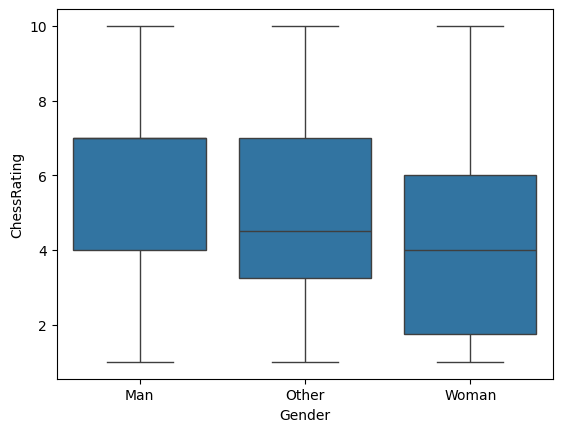

In [22]:
genderForAnalysis_df = filter_threshold(cleaned_df,"Gender",25)

sns.boxplot(x=genderForAnalysis_df["Gender"],y=genderForAnalysis_df["ChessRating"])
plt.ylim(reversed(plt.ylim()))

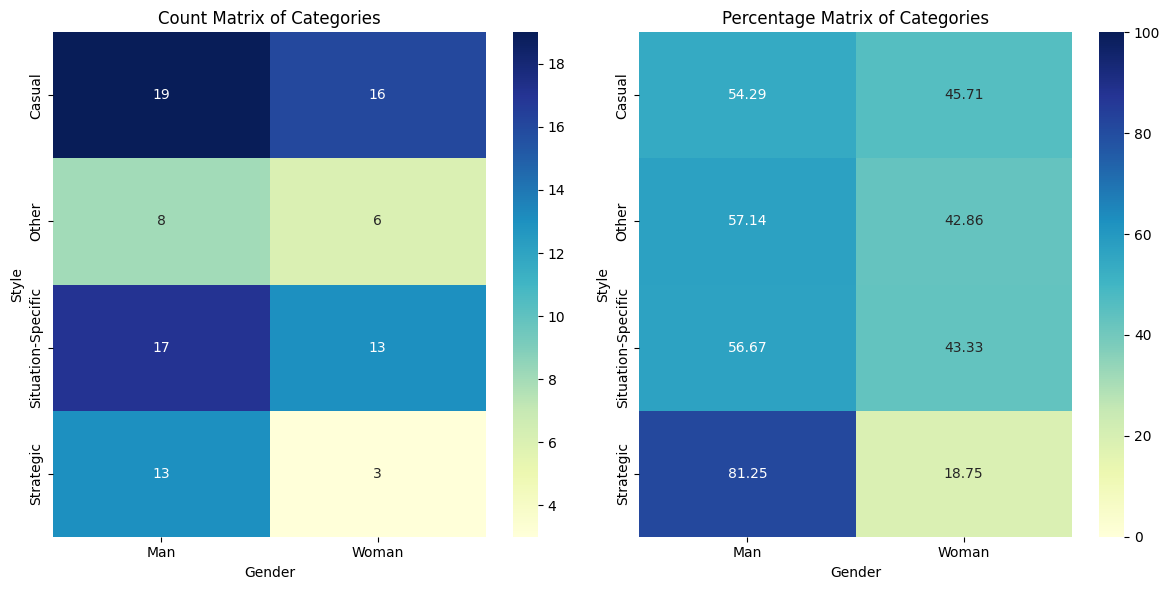

In [23]:
selected_rows = filter_threshold(genderForAnalysis_df[genderForAnalysis_df["Gender"] != "Other"], "Style", 15)
plot_count_and_percentage_heatmaps(selected_rows["Style"],selected_rows["Gender"])

In [24]:
unique_preferred_elements

['',
 'Conflict/Competition',
 'Cooperation',
 'Heavy/Immersive Theming',
 'Luck',
 'Party/Low-Stakes',
 'Puzzle-Solving',
 'Social Deduction/Hidden Role',
 'Strategy',
 'Trivia']

Gender
Man      57
Other    18
Woman    38
Name: count, dtype: int64


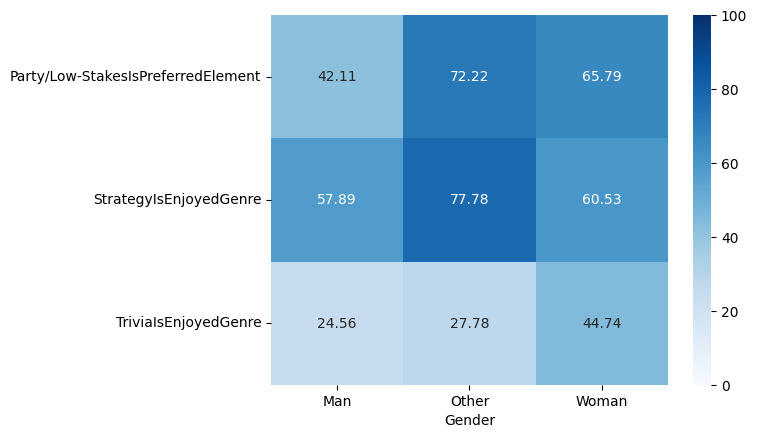

In [25]:
plot_heatmap_of_bool_features_percent(genderForAnalysis_df,"Gender",["StrategyIsEnjoyedGenre","TriviaIsEnjoyedGenre","Party/Low-StakesIsPreferredElement"])

Gender
Man      57
Other    18
Woman    38
Name: count, dtype: int64


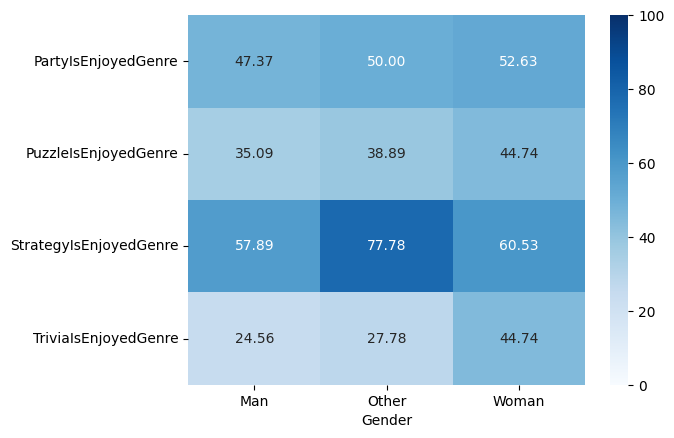

In [26]:
plot_heatmap_of_bool_features_percent(genderForAnalysis_df,"Gender",["StrategyIsEnjoyedGenre","TriviaIsEnjoyedGenre","PartyIsEnjoyedGenre","PuzzleIsEnjoyedGenre"])

Style
Casual                36
Other                  9
Party/Social          11
Situation-Specific    35
Strategic             22
Name: count, dtype: int64


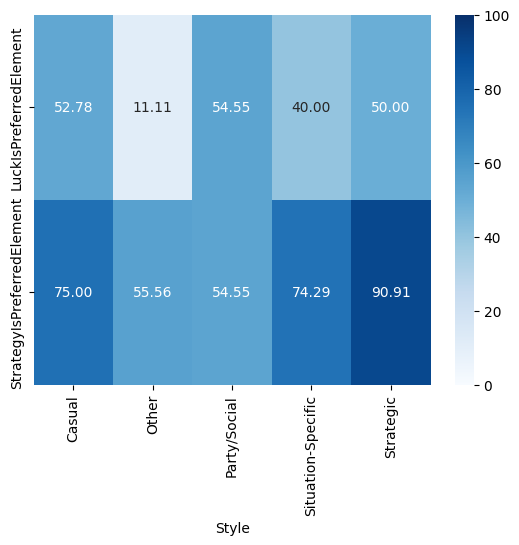

In [27]:
plot_heatmap_of_bool_features_percent(filter_threshold(cleaned_df,"Style",9),"Style",["StrategyIsPreferredElement","LuckIsPreferredElement"])

AOSCat
Arts & Humanities    23
Other                24
STEM                 52
Unknown              14
Name: count, dtype: int64


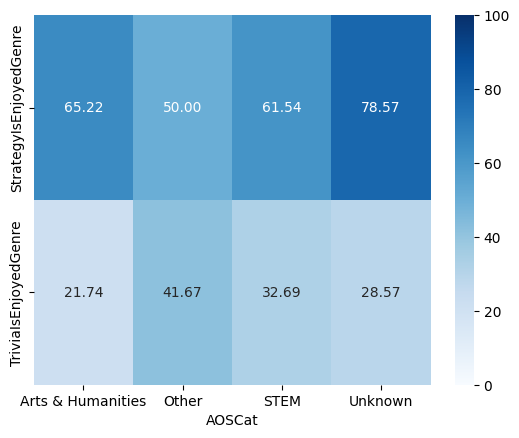

In [28]:
plot_heatmap_of_bool_features_percent(filter_threshold(cleaned_df, "AOSCat", 10),"AOSCat",["StrategyIsEnjoyedGenre","TriviaIsEnjoyedGenre"])

In [29]:
cleaned_df["Vision"].value_counts()

Vision
None        61
Glasses     36
Both        12
Contacts     4
Name: count, dtype: int64

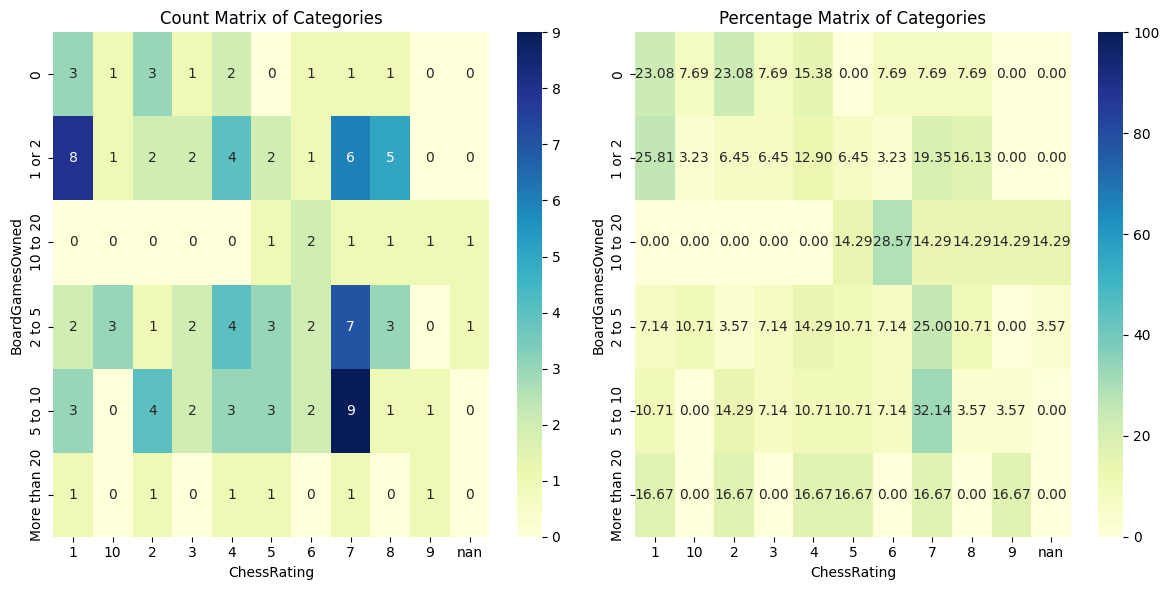

In [30]:
range_order = ['0', '1 or 2', '2 to 5', '5 to 10', '10 to 20', "More than 20"]

# Convert the 'BoardGamesOwned' column to a categorical type with the specified order
copy_df = cleaned_df.copy()
copy_df['BoardGamesOwned'] = copy_df['BoardGamesOwned'].apply(lambda x: "0" if x == "I do not own any board/card games.\xa0" else x)

copy_df['BoardGamesOwned'] = pd.Categorical(copy_df['BoardGamesOwned'], categories=range_order, ordered=True)

copy_df['ChessRating'] = copy_df['ChessRating'].astype(str)
copy_df['ChessRating'] = pd.Categorical(copy_df['ChessRating'], categories=["nan","0","1","2","3","4","5","6","7","8","9","10"], ordered=True)

plot_count_and_percentage_heatmaps(copy_df['BoardGamesOwned'], copy_df["ChessRating"])

### Machine Learning